# Project- Gotham City Cabs

**Quick Overview**

This problem is considered a Type-A project. Each team can have a maximum number of
3 members, and would need to pick one Type-A project and one Type-B project among the
four project options. <br>
Instances of this problem have been the subject of final projects in the past years. How-
ever, yet there are so many structures in the data which are unexplored. Specifically, with
the rise of graph neural networks, we now have much stronger tools to tackle problems of
this type. <br>
This is a regression problem, where a model needs to be trained to predict the travel
time of a cab from one point in the city to the other. You would see that the times in the
data are around year 2034. However, the user still can extract the day of the week from the
times given in the data.

**Problem Setup**

It is around the year 2034 in the city of Gotham, and the last time Batman got into a fight
with the Joker, the Batmobile (Batman's high-tech car) was seriously damaged. Apparently,it would take his butler, Alfred, a while to fix the car and during that time Batman needs to use a cab to do his world saving business! <br>
Alfred needs your help to come up with a good prediction of the taxi trip duration between multiple points of the Gotham city. If he can make such predictions, then that significantly helps with Batman's missions. <br>
Lucius (Batman's tech support staff) has been able to pull out a rich dataset of the recorded taxi durations between various parts of the city and is sharing that with you for your modeling purposes. <br>
The input features of the aforementioned data file are:

The input features of the aforementioned data file are:

    -pickup datetime: a variable containing a date and a time specifying the date and thetime the taxi picked of a passenger. For instance, you may observe a pickup datetime of \6/14/2034 3:00:00 AM", which indicates the time the taxi picked up the passenger. Note that you may also obtain the day of the week, or the season information from this dataset. For instance, if we look up the 2034 calendar (search it on Google), you would see that \6/14/2034" is a Wednesday.

    -NumberOfPassengers: The number of passengers loaded to the cab. Note that all passengers are loaded together and are dropped o together. So in case you see 5 people loaded, it means they all got to the cab together and all got o at the destination.
    
    -pickup x: This is a variable that represents the x coordinate of the location the taxi picked up the passenger.
    
    -pickup y: This is a variable that represents the y coordinate of the location the taxi picked up the passenger.
    
    -dropoff x: This is a variable that represents the x coordinate of the location the taxi dropped o the passenger.

    -dropoff y: This is a variable that represents the y coordinate of the location the taxi dropped o the passenger.

The response variable is:
    
    -duration: which is the duration of the trip in seconds.

**Modeling Instructions**

You would need to use the file Train.csv to fit your models. Your model can take pickup datetime, NumberOfPassengers, pickup x, pickup y, dropoff x and dropoff y as inputs and should be able to predict the quantity duration. Please make sure to communicate with the instructor and Piazza about any potential questions related to the data.

<br>

<br>

In [1]:
#all libraries here
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb
import matplotlib.pyplot as plt

### Dataset Information

In [2]:
#importing data file
original=pd.read_csv('Batman.csv')

In [3]:
#shape
original.shape

(1000000, 7)

In [4]:
#dataset information
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
pickup_datetime       1000000 non-null object
NumberOfPassengers    1000000 non-null int64
duration              1000000 non-null int64
pickup_x              1000000 non-null float64
pickup_y              1000000 non-null float64
dropoff_x             1000000 non-null float64
dropoff_y             1000000 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 53.4+ MB


In [5]:
#first few rows of the dataset
original.head()

,pickup_datetime,NumberOfPassengers,duration,pickup_x,pickup_y,dropoff_x,dropoff_y
0,2034-01-30 10:24:44,1,724,162.837930,341.187316,160.391473,367.907042
1,2034-03-09 23:10:11,1,127,150.375222,307.042187,152.623686,318.383231
2,2034-05-02 20:23:17,6,386,156.586093,333.063670,169.397955,315.001104
3,2034-06-21 17:51:55,1,1192,161.738726,344.609009,167.702052,310.817653
4,2034-05-15 18:38:15,2,315,174.419521,344.441542,165.780203,344.275954


### Understanding Data

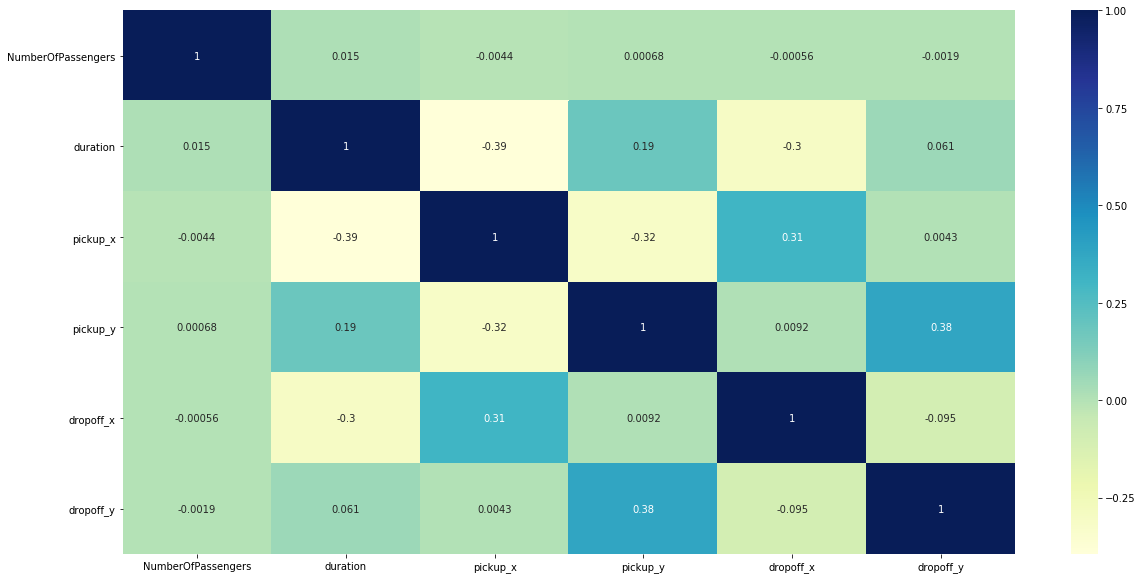

In [6]:
plt.figure(figsize = (20,10))
dataplot = sb.heatmap(original.corr(), cmap="YlGnBu", annot=True)

**Pickup DateTime:**

In [7]:
#pickup date time
original.pickup_datetime.unique()

array(['2034-01-30 10:24:44', '2034-03-09 23:10:11',
       '2034-05-02 20:23:17', ..., '2034-06-28 16:32:32',
       '2034-03-01 19:47:01', '2034-05-16 06:14:23'], dtype=object)

**Observation:**: Date format looks consistent but the date is in string data type.

**Number of Passanger:**

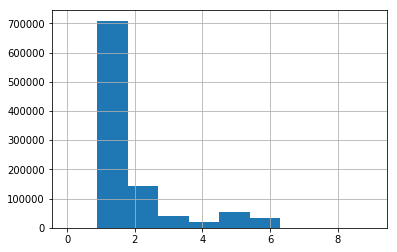

In [8]:
original.NumberOfPassengers.hist()

In [9]:
original.NumberOfPassengers.unique()

array([1, 6, 2, 5, 3, 4, 9, 0, 7], dtype=int64)

In [10]:
#rides with 0 passangers
original[original.NumberOfPassengers==0].head()

,pickup_datetime,NumberOfPassengers,duration,pickup_x,pickup_y,dropoff_x,dropoff_y
34257,2034-02-13 00:27:26,0,37,141.662142,282.050134,141.056148,281.417440
38721,2034-06-02 03:21:48,0,57,259.201026,396.345874,259.389975,395.403418
80468,2034-06-01 19:55:05,0,21,143.772202,339.989591,143.268478,339.466018
102389,2034-04-14 14:42:19,0,41,148.884610,332.282666,148.631285,331.511744
109560,2034-04-23 20:20:36,0,3,145.557839,316.532040,144.763075,315.674596


**Observation**: Intresting point: rides with 0 passengers. Data is rightly skewed. Outliers are present. Total 40 rides where passengers=0

**Duration:**

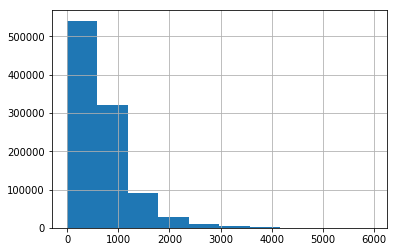

In [11]:
#duration column
original.duration.hist()

In [12]:
#rides with 0 duration
original[original.duration==0].shape

(7, 7)

**Observation**: Rides with very short durations is present (including 0 seconds rides). Data is righly skewed. Outliers are present.

**Pickup and Dropoff Coordinates:**

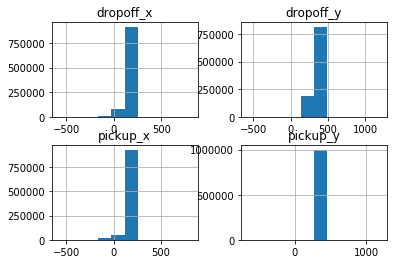

In [13]:
original[['pickup_x', 'pickup_y', 'dropoff_x', 'dropoff_y']].hist();

**Observation:** Seemed to be left skewed.

### Feature Engineering

Operations:<br>
Seperate date and time and crate new features:
    - date, time, month, year, weekday, part of the day, part of the month
    - Distance between the two points

In [14]:
#creating a copy of the dataframe
f_df=original.copy()

In [15]:
#changing datatype of pickup_datetime object
f_df['pickup_datetime']=pd.to_datetime(f_df['pickup_datetime'])

#finding date, time, month, year, weeekday
f_df['date']=f_df['pickup_datetime'].dt.day
f_df['time']=f_df['pickup_datetime'].dt.time
f_df['month']=f_df['pickup_datetime'].dt.strftime('%b')
f_df['year']=f_df['pickup_datetime'].dt.year
f_df['weekday']=f_df['pickup_datetime'].dt.day_name()


#function to find part of the day
def get_part_of_the_day(x):
    if (x >= 4) and (x < 8):
        return 'early morning'
    elif (x >= 8) and (x < 12 ):
        return 'morning'
    elif (x >= 12) and (x < 16):
        return'afternoon'
    elif (x >= 16) and (x < 20) :
        return 'evening'
    elif (x >= 20) and (x < 24):
        return'night'
    elif (x < 4):
        return'late night'
#get part of the day
f_df['part_of_day']=f_df['pickup_datetime'].dt.hour.apply(get_part_of_the_day)



#function to find part of month
def get_part_of_month(x):
    if (x >= 1) and (x <=10):
        return 'early month'
    elif (x >= 11) and (x <= 20 ):
        return 'mid month'
    elif (x >= 21) and (x <= 31):
        return 'end month'

#get part of the day
f_df['part_of_month']=f_df['pickup_datetime'].dt.day.apply(get_part_of_month)


In [16]:
#finding distance between the two points d=sqrt((x2−x1)2+(y2−y1)2)
a=(f_df['dropoff_x']-f_df['pickup_x'])**2
b=(f_df['dropoff_y']-f_df['pickup_y'])**2
f_df['distance']=np.sqrt(a+b)

In [17]:
#first few rows of featured dataset
f_df.head()

,pickup_datetime,NumberOfPassengers,duration,pickup_x,pickup_y,dropoff_x,dropoff_y,date,time,month,year,weekday,part_of_day,part_of_month,distance
0,2034-01-30 10:24:44,1,724,162.837930,341.187316,160.391473,367.907042,30,10:24:44,Jan,2034,Monday,morning,end month,26.831491
1,2034-03-09 23:10:11,1,127,150.375222,307.042187,152.623686,318.383231,9,23:10:11,Mar,2034,Thursday,night,early month,11.561785
2,2034-05-02 20:23:17,6,386,156.586093,333.063670,169.397955,315.001104,2,20:23:17,May,2034,Tuesday,night,early month,22.144980
3,2034-06-21 17:51:55,1,1192,161.738726,344.609009,167.702052,310.817653,21,17:51:55,Jun,2034,Wednesday,evening,end month,34.313511
4,2034-05-15 18:38:15,2,315,174.419521,344.441542,165.780203,344.275954,15,18:38:15,May,2034,Monday,evening,mid month,8.640904


<br>

### Understanding data-II (For Featured Columns)

In [18]:
f_df.head()

,pickup_datetime,NumberOfPassengers,duration,pickup_x,pickup_y,dropoff_x,dropoff_y,date,time,month,year,weekday,part_of_day,part_of_month,distance
0,2034-01-30 10:24:44,1,724,162.837930,341.187316,160.391473,367.907042,30,10:24:44,Jan,2034,Monday,morning,end month,26.831491
1,2034-03-09 23:10:11,1,127,150.375222,307.042187,152.623686,318.383231,9,23:10:11,Mar,2034,Thursday,night,early month,11.561785
2,2034-05-02 20:23:17,6,386,156.586093,333.063670,169.397955,315.001104,2,20:23:17,May,2034,Tuesday,night,early month,22.144980
3,2034-06-21 17:51:55,1,1192,161.738726,344.609009,167.702052,310.817653,21,17:51:55,Jun,2034,Wednesday,evening,end month,34.313511
4,2034-05-15 18:38:15,2,315,174.419521,344.441542,165.780203,344.275954,15,18:38:15,May,2034,Monday,evening,mid month,8.640904


**Observation**: `pickup_datetime` can be removed now.

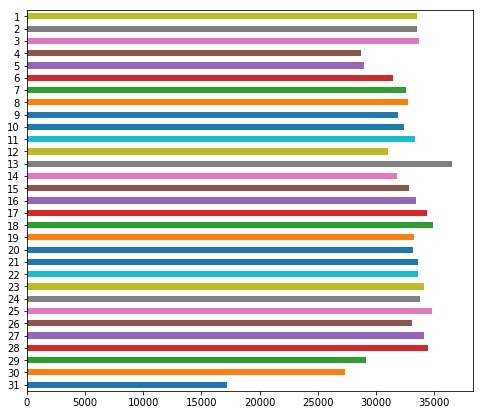

In [19]:
#date
f_df.date.value_counts().sort_index(ascending=False).plot(kind = 'barh', figsize=(8,7))

**Observations**: Nearly equal number of trips on each day

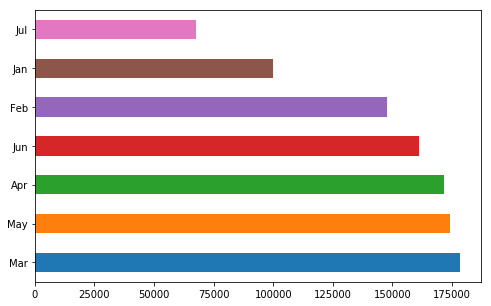

In [20]:
#month
f_df.month.value_counts().plot(kind = 'barh', figsize=(8,5))

**Observation:**- Intresting point: Rides details are not present for August and later months.

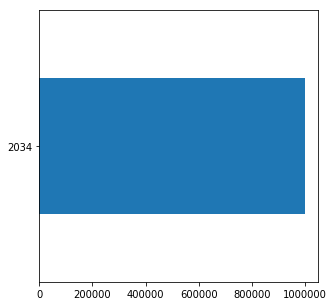

In [21]:
#year
f_df.year.value_counts().sort_index(ascending=False).plot(kind = 'barh', figsize=(5,5))

**Observation**: Only one year of data present. In this case year column can be dropped.

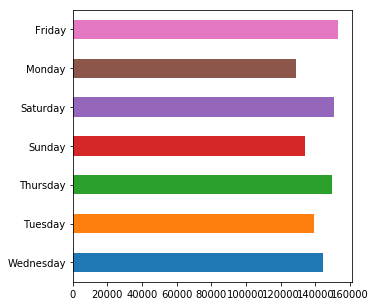

In [22]:
#weekday
f_df.weekday.value_counts().sort_index(ascending=False).plot(kind = 'barh', figsize=(5,5))

**Observation**: On Fridays, people took most number of trips. (Monday is 0)

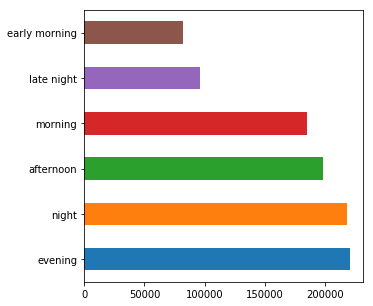

In [23]:
#part of the day
f_df.part_of_day.value_counts().plot(kind = 'barh', figsize=(5,5))

**Observation:** Afternoon, evening and night observed most number of rides. People took less rides in early morning and late night.

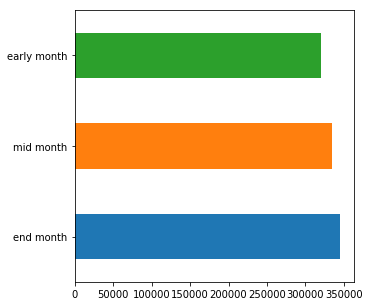

In [24]:
#part of the day
f_df.part_of_month.value_counts().plot(kind = 'barh', figsize=(5,5))

**Observation:** No one part of the month witnessed significant higer rides than others.

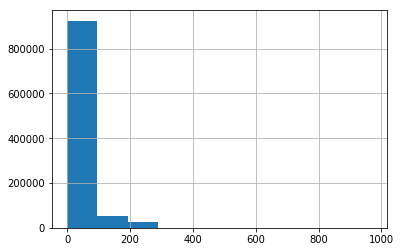

In [25]:
#distance column
f_df.distance.hist()

**Observation**: Data is rightly skewed. Outliers are present.

### Cleaning and Transformations

After observing data, following steps can be perfomed to clean and transform data:<br>
1) Drop columns: `pickup_datetime`, `year`. `time`, `pickup_x`, `pickup_y`, `dropoff_x`, `dropoff_y`, `date`. <br>
2) Rearranging the columns. <br>
3) Removing rides with 0 riders. <br>
4) Handling outliers and skewed data. <br>
5) Encoding categorical features.

In [26]:
#new copy
clean_df=f_df.copy()

In [27]:
f_df.columns

Index(['pickup_datetime', 'NumberOfPassengers', 'duration', 'pickup_x',
       'pickup_y', 'dropoff_x', 'dropoff_y', 'date', 'time', 'month', 'year',
       'weekday', 'part_of_day', 'part_of_month', 'distance'],
      dtype='object')

In [28]:
#drop columns
clean_df=clean_df.drop(columns=['pickup_datetime', 'year', 'time', 'pickup_x', 'pickup_y', 'dropoff_x', 'dropoff_y', 'date'])

#re-arragnging the columns
clean_df=clean_df[['month', 'part_of_month', 'weekday','part_of_day','NumberOfPassengers', 'distance', 'duration']]

#removing rides with 0 riders 
clean_df=clean_df[clean_df.NumberOfPassengers!=0]

#first few rows of dataset
clean_df.head()

,month,part_of_month,weekday,part_of_day,NumberOfPassengers,distance,duration
0,Jan,end month,Monday,morning,1,26.831491,724
1,Mar,early month,Thursday,night,1,11.561785,127
2,May,early month,Tuesday,night,6,22.144980,386
3,Jun,end month,Wednesday,evening,1,34.313511,1192
4,May,mid month,Monday,evening,2,8.640904,315


In [29]:
# current skewness
clean_df.skew()

NumberOfPassengers    2.129048
distance              3.114319
duration              2.193092
dtype: float64

For highly-skewed feature distributions, it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

In [30]:
# Log-transform the skewed features
skewed = ['distance', 'duration']
clean_df[skewed] = clean_df[skewed].apply(lambda x: np.log(x + 1))

#skewness after the transformation
clean_df.skew()

NumberOfPassengers    2.129048
distance              0.308928
duration             -0.635176
dtype: float64

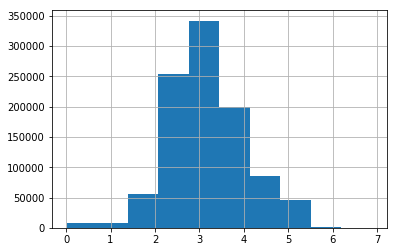

In [31]:
#distance histogram
clean_df.distance.hist()

**Observation**: Histogram is in better shap than before. Resembles normal distribution.

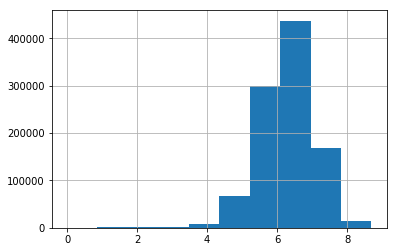

In [32]:
#duration histogram
clean_df.duration.hist()

**Observation**: Histogram is in better shap than before.

In [33]:
#first few rows of the dataset
clean_df.head()

,month,part_of_month,weekday,part_of_day,NumberOfPassengers,distance,duration
0,Jan,end month,Monday,morning,1,3.326168,6.586172
1,Mar,early month,Thursday,night,1,2.530659,4.852030
2,May,early month,Tuesday,night,6,3.141778,5.958425
3,Jun,end month,Wednesday,evening,1,3.564266,7.084226
4,May,mid month,Monday,evening,2,2.266015,5.755742


In [34]:
#encoding categorical features
clean_df = pd.get_dummies(clean_df)
#first few rows of the dataset after encoding
clean_df.head()

,NumberOfPassengers,distance,duration,month_Apr,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,part_of_day_afternoon,part_of_day_early morning,part_of_day_evening,part_of_day_late night,part_of_day_morning,part_of_day_night
0,1,3.326168,6.586172,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,2.530659,4.852030,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,6,3.141778,5.958425,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,3.564266,7.084226,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2,2.266015,5.755742,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


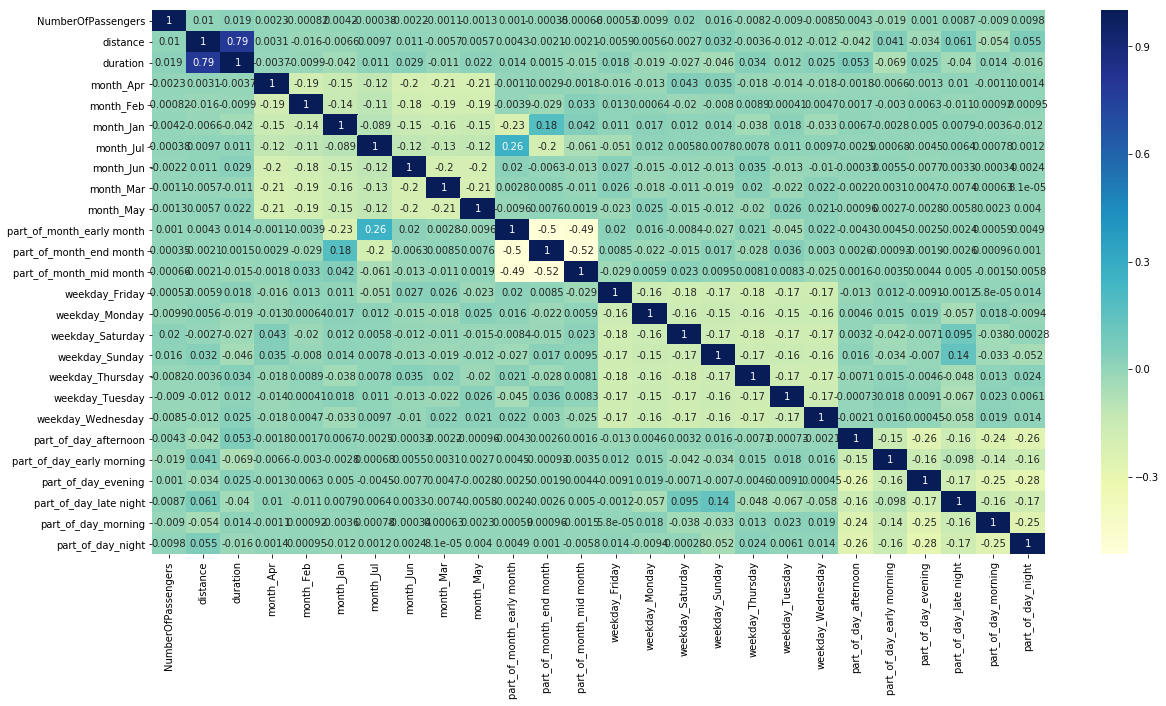

In [35]:
#checking co-relation matrix again
plt.figure(figsize = (20,10))
dataplot = sb.heatmap(clean_df.corr(), cmap="YlGnBu", annot=True)

### Storing the final dataset file

In [36]:
#clean_df.to_csv('cleaned_batman_final_train.csv', index=False)

### Creating a function for test cleaning and transformation

In [37]:
#function to find part of the day
def get_part_of_the_day(x):
    if (x >= 4) and (x < 8):
        return 'early morning'
    elif (x >= 8) and (x < 12 ):
        return 'morning'
    elif (x >= 12) and (x < 16):
        return'afternoon'
    elif (x >= 16) and (x < 20) :
        return 'evening'
    elif (x >= 20) and (x < 24):
        return'night'
    elif (x < 4):
        return'late night'
    
    
#function to find part of month
def get_part_of_month(x):
    if (x >= 1) and (x <=10):
        return 'early month'
    elif (x >= 11) and (x <= 20 ):
        return 'mid month'
    elif (x >= 21) and (x <= 31):
        return 'end month'


In [38]:
def test_clean_transform(test_df):
    
    #changing datatype of pickup_datetime object
    test_df['pickup_datetime']=pd.to_datetime(test_df['pickup_datetime'])

    #finding date, time, month, year, weeekday
    test_df['date']=test_df['pickup_datetime'].dt.day
    test_df['time']=test_df['pickup_datetime'].dt.time
    test_df['month']=test_df['pickup_datetime'].dt.strftime('%b')
    test_df['year']=test_df['pickup_datetime'].dt.year
    test_df['weekday']=test_df['pickup_datetime'].dt.day_name()


    #get part of the day
    test_df['part_of_day']=test_df['pickup_datetime'].dt.hour.apply(get_part_of_the_day)

    #get part of the day
    test_df['part_of_month']=test_df['pickup_datetime'].dt.day.apply(get_part_of_month)
    
    #finding distance between the two points d=sqrt((x2−x1)2+(y2−y1)2)
    a=(test_df['dropoff_x']-test_df['pickup_x'])**2
    b=(test_df['dropoff_y']-test_df['pickup_y'])**2
    test_df['distance']=np.sqrt(a+b)
    
    #drop columns
    test_df=test_df.drop(columns=['pickup_datetime', 'year', 'time', 'pickup_x', 'pickup_y', 'dropoff_x', 'dropoff_y', 'date'])

    #re-arragnging the columns
    test_df=test_df[['month', 'part_of_month', 'weekday','part_of_day','NumberOfPassengers', 'distance']]

    #removing rides with 0 riders 
    #test_df=test_df[test_df.NumberOfPassengers!=0]
    
    # Log-transform the skewed features
    skewed = ['distance']
    test_df[skewed] = test_df[skewed].apply(lambda x: np.log(x + 1))

    #encoding categorical features
    test_df = pd.get_dummies(test_df)
    
    return test_df


In [39]:
test_file=pd.read_csv('Gotham_Test_Set.csv')
test_cleaned=test_clean_transform(test_file)

In [40]:
test_cleaned.to_csv('cleaned_batman_final_test_updated.csv', index=False)